In [90]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://ubc-cs.github.io/cpsc330-2025W2/#lecture-schedule-tentative)

**Due date: See [deliverable due dates](https://ubc-cs.github.io/cpsc330-2025W2/#deliverable-due-dates-tentative)**.

## Imports 

In [91]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W2/syllabus#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W2/docs/homework-instructions) for detailed guidance on completing and submitting assignments. 
   
</div>

_Points:_ 5

<!-- END QUESTION -->

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._


<br><br>

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

## Exercise 1: Dataset and preliminary EDA
<hr>


In this homework, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). If it’s not already in the data folder, download the CSV and save it as `adult.csv` inside the `data` folder of this homework directory.

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [92]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Typically, having more data for training is beneficial. However, in this lab, we'll be using a 40%/60% split because running cross-validation with this dataset can take a long time on a modest laptop. Using a smaller training set will make the model training a bit faster on your laptop. Additionally, with a larger test split, we’ll obtain a more reliable estimate of the model's performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

In [93]:
train_df, test_df = train_test_split(census_df, test_size=0.6, random_state=123)

In [94]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

Let's examine our `train_df`. 

In [95]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [96]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [97]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 1.2 `describe()` method
rubric={autograde}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What are the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns, irrespective of whether you want to include them in your model or not, as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 5

In [98]:
census_summary = train_df.describe(include="all")

...

Ellipsis

In [99]:
max_hours_per_week = census_summary.loc["max", 'hours.per.week']

...

Ellipsis

In [100]:
most_freq_occupation = census_summary.loc["top", 'occupation']

...

Ellipsis

In [101]:
...

Ellipsis

In [102]:
missing_vals_cols = train_df.columns[train_df.isnull().any()].tolist()
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

...

Ellipsis

In [103]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [104]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Visualizing features
rubric={viz,reasoning}

**Your tasks:**

1. For each numeric feature listed in `numeric_cols`, generate overlapping histograms for the <=50K and >50K classes, similar to how you did it in homework 2.
2. Provide a brief description of your preliminary observations based on the histograms. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 4

- **Age**: The <=50K group has a strong peak around age 20-25, indicating many younger workers earn less. In contrast, the >50K group shows a broader distribution with peak frequencies around ages 35-50, suggesting middle-aged individuals are more likely to have higher incomes. Both distributions taper off after age 60, with very few high earners beyond 70.

- **Capital.gain**: Using log scale reveals that the vast majority of individuals (approximately 10,000 in both groups) report zero capital gains. However, among those with non-zero capital gains, the >50K group shows substantially more occurrences across all gain levels, particularly at the highest gain value (~100,000), where >50K earners dominate. This suggests capital gains are a strong discriminating feature for income prediction.

- **Capital.loss**: Similar to capital.gain, most individuals (around 10,000) report zero capital losses. The log scale shows that the >50K group has more instances of capital losses in the 1,500-2,500 range, while both groups have comparable frequencies for smaller losses. This feature may be less discriminative than capital.gain but still provides useful information.

- **Education.num**: This feature shows the strongest separation between income groups. The <=50K distribution peaks sharply at education level 9 and 10, with over 3,500 individuals. The >50K distribution shows high frequencies at levels 13 with ~900 individuals and levels 9-10 with ~650 individuals, indicating higher education correlates with higher income.

- **Fnlwgt (final weight)**: Both income groups display nearly identical bell-shaped distributions centered around 200,000, with the <=50K group showing slightly higher frequencies across all weight ranges. The similarity of these distributions suggests this feature provides minimal discriminative power for income classification and may not be useful for the model.

- **Hours.per.week**: Both groups show a dramatic spike at 40 hours per week, with approximately 5,000 individuals in the <=50K group and 1,300 in the >50K group working standard full-time hours. The >50K group shows relatively higher proportions at 45-60 hours per week, suggesting longer work hours may be associated with higher income. The <=50K group has more representation at part-time hours (under 40), indicating part-time work is more common among lower earners.

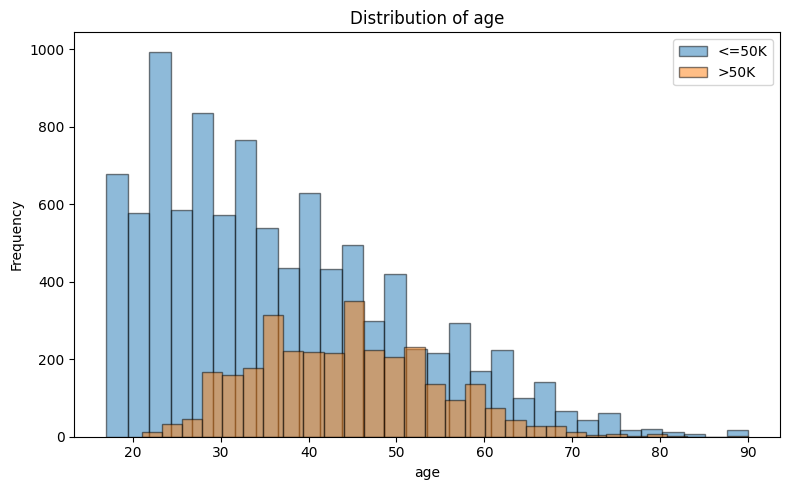

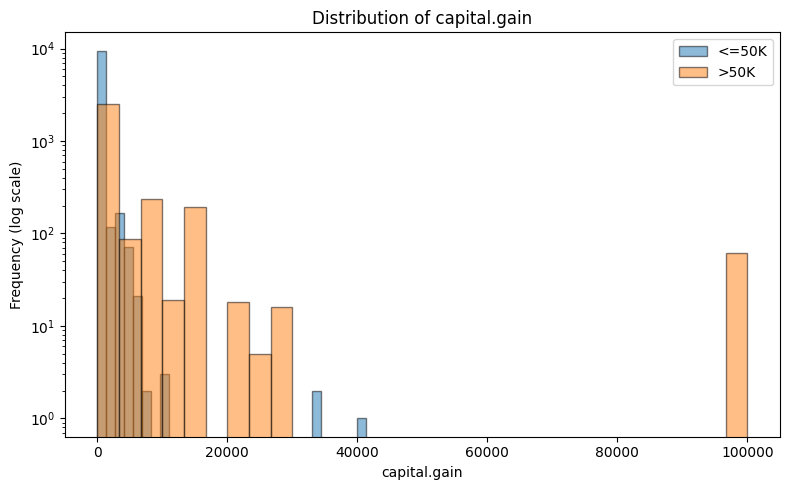

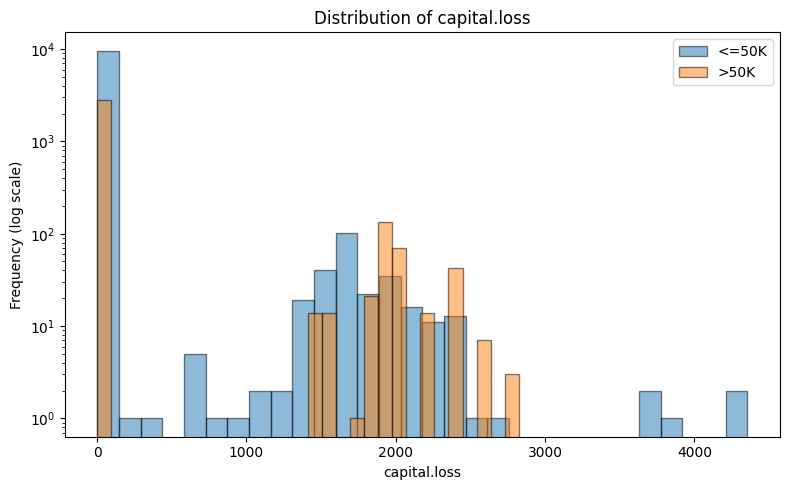

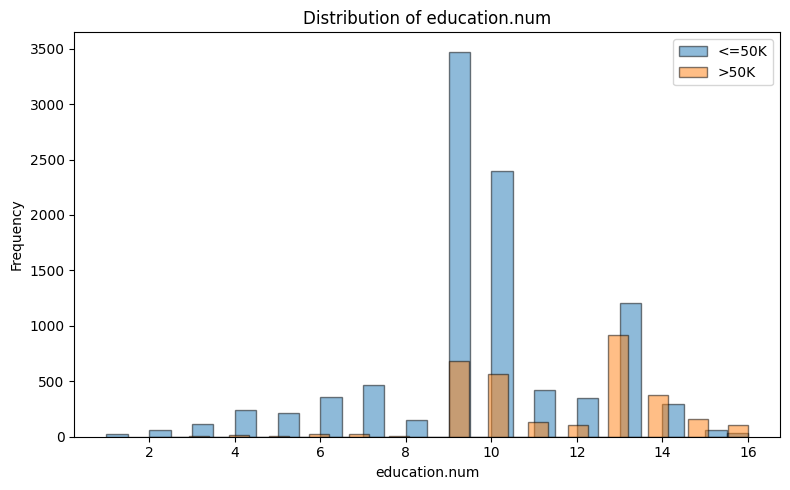

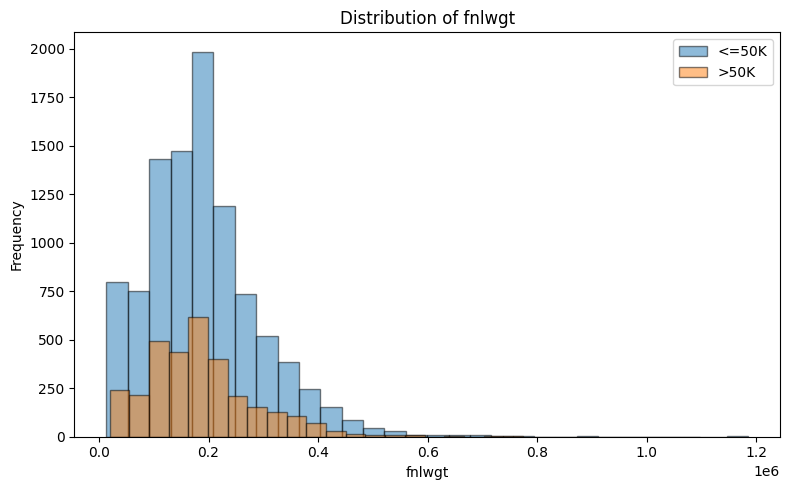

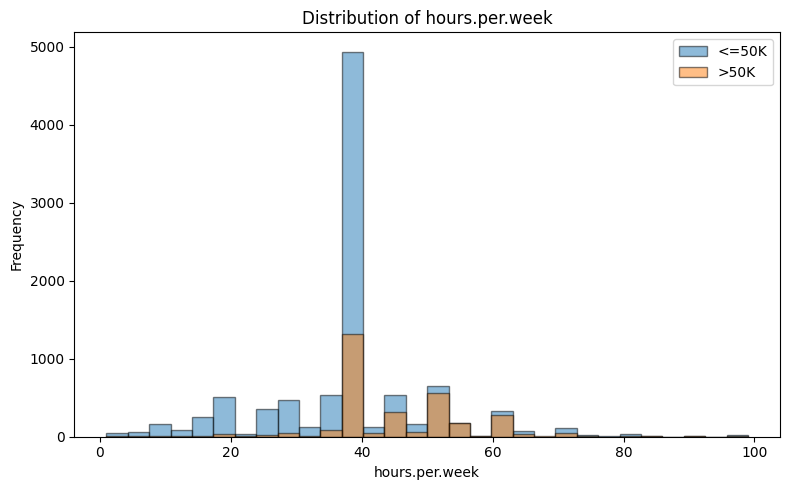

In [105]:
# Create histogram for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    
    # Split data by income class
    low_income = train_df[train_df['income'] == '<=50K'][col]
    high_income = train_df[train_df['income'] == '>50K'][col]
    
    # Plot overlapping histograms
    plt.hist(low_income, alpha=0.5, label='<=50K', bins=30, edgecolor='black')
    plt.hist(high_income, alpha=0.5, label='>50K', bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.legend()
    
    # For capital.gain and capital.loss, use log scale on y-axis to better visualize
    if col in ['capital.gain', 'capital.loss']:
        plt.yscale('log')
        plt.ylabel('Frequency (log scale)')
    
    plt.tight_layout()
    plt.show()

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: Identifying different feature types and transformations  
<hr>

Typically, data isn't readily formatted for direct input into machine learning models. It's crucial for a machine learning practitioner to examine each column and determine an effective method for encoding its information. Let's determine the types of features we have and come up with suitable encoding strategies for them. 

<!-- BEGIN QUESTION -->

### 2.1 Identify transformations to apply
rubric={reasoning}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below for the purpose of autograding. 

> You can find the information about the columns [here](http://archive.ics.uci.edu/ml/datasets/Adult).

<div class="alert alert-warning">

Solution_2.1
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling with `StandardScaler` |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding | This is a categorical feature with missing values. We need imputation to handle missing values because most models and encoders cannot handle missing categories directly, followed by one-hot encoding to convert categories into numerical format suitable for ML models. Moreover, One-hot encoding is applied because the categories have no natural ordering, and one-hot encoding avoids introducing artificial ordinal relationships while allowing the model to learn separate effects for each category.
| fnlwgt | drop |  This is a sampling weight feature that represents survey methodology rather than individual characteristics. It reflects how the record should be weighted to represent the population, rather than a meaningful “feature” about the person. The histograms show nearly identical distributions across income groups, suggesting it has minimal predictive power and should be dropped.
| education | ordinal encoding | This feature represents educational attainment levels with a natural ordering (e.g, high school < college < bachelor < graduate degree) Ordinal encoding preserves this hierarchical relationship, which is more appropriate than one-hot encoding that would treat education levels as unrelated categories.
| education.num | drop |  This is a numeric representation of the education feature, making it redundant. Since we're already using ordinal encoding on the education feature, we should drop this to avoid multicollinearity.
| marital.status | one-hot encoding  |   This categorical feature has multiple unordered categories (married, divorced, never-married) with no natural hierarchy and no meaningful numeric ordering. One-hot encoding is appropriate to represent each category as a separate binary feature. It prevents imposing an artificial order and allows the model to learn separate effects for each marital status category.
| occupation | imputation, one-hot encoding  |  This is a categorical feature with missing values. Similar to workclass, we need imputation for missing values followed by one-hot encoding since occupation categories have no inherent ordering.
| relationship | one-hot encoding  |  Relationship (Husband, Wife, Own-child, Not-in-family) is a nominal categorical feature. The categories do not have a natural order, so one-hot encoding is suitable. This representation enables the model to capture different impacts of relationship types on the target without forcing an artificial numerical scale.
| race | drop  |    Race is a sensitive attribute and including it risks the model learning and amplifying societal bias. Dropping it is a reasonable choice to reduce fairness/ethical concerns and to avoid using protected characteristics in prediction.
| sex | one-hot encoding with "binary=True" |  This is a binary categorical feature with only two values (male/female). Using one-hot encoding with drop='if_binary' creates a single binary column (0/1), which is more efficient than creating two columns.
| capital.gain | scaling with `StandardScaler` |   A numeric feature with a wide range (0 to ~100,000) and heavy skew toward zero. Scaling helps models that are sensitive to magnitude and distance computations (linear models, SVM, kNN) and improves numerical stability during optimization. StandardScaler standardizes the feature so it does not dominate other numeric inputs purely due to scale.
| capital.loss | scaling with `StandardScaler` |   Similar to capital.gain, this numeric feature has a wide range and is heavily skewed. Scaling ensures it's on a comparable scale with other numeric features.
| hours.per.week | scaling with `StandardScaler` |   A numeric feature ranging from part-time to overtime hours. Scaling ensures this feature has similar magnitude to other scaled numeric features, preventing it from dominating distance calculations.
| native.country | imputation, one-hot encoding |   A categorical feature with many countries and some missing values. Imputation handles missing data, and one-hot encoding converts the many categories into binary features for the model.


_Points:_ 13

**Explanations for transformations:**

- **workclass**: This is a categorical feature with missing values. We need imputation to handle missing values because most models and encoders cannot handle missing categories directly, followed by one-hot encoding to convert categories into numerical format suitable for ML models. Moreover, One-hot encoding is applied because the categories have no natural ordering, and one-hot encoding avoids introducing artificial ordinal relationships while allowing the model to learn separate effects for each category.

- **fnlwgt**: This is a sampling weight feature that represents survey methodology rather than individual characteristics. It reflects how the record should be weighted to represent the population, rather than a meaningful “feature” about the person. The histograms show nearly identical distributions across income groups, suggesting it has minimal predictive power and should be dropped.

- **education**: This feature represents educational attainment levels with a natural ordering (e.g, high school < college < bachelor < graduate degree) Ordinal encoding preserves this hierarchical relationship, which is more appropriate than one-hot encoding that would treat education levels as unrelated categories.

- **education.num**: This is a numeric representation of the education feature, making it redundant. Since we're already using ordinal encoding on the education feature, we should drop this to avoid multicollinearity.

- **marital.status**: This categorical feature has multiple unordered categories (married, divorced, never-married) with no natural hierarchy and no meaningful numeric ordering. One-hot encoding is appropriate to represent each category as a separate binary feature. It prevents imposing an artificial order and allows the model to learn separate effects for each marital status category.

- **occupation**: This is a categorical feature with missing values. Similar to workclass, we need imputation for missing values followed by one-hot encoding since occupation categories have no inherent ordering.

- **relationship**: Relationship (Husband, Wife, Own-child, Not-in-family) is a nominal categorical feature. The categories do not have a natural order, so one-hot encoding is suitable. This representation enables the model to capture different impacts of relationship types on the target without forcing an artificial numerical scale.

- **race**: Race is a sensitive attribute and including it risks the model learning and amplifying societal bias. Dropping it is a reasonable choice to reduce fairness/ethical concerns and to avoid using protected characteristics in prediction.

- **sex**: This is a binary categorical feature with only two values (male/female). Using one-hot encoding with drop='if_binary' creates a single binary column (0/1), which is more efficient than creating two columns.

- **capital.gain**: A numeric feature with a wide range (0 to ~100,000) and heavy skew toward zero. Scaling helps models that are sensitive to magnitude and distance computations (linear models, SVM, kNN) and improves numerical stability during optimization. StandardScaler standardizes the feature so it does not dominate other numeric inputs purely due to scale.

- **capital.loss**: Similar to capital.gain, this numeric feature has a wide range and is heavily skewed. Scaling ensures it's on a comparable scale with other numeric features.

- **hours.per.week**: A numeric feature ranging from part-time to overtime hours. Scaling ensures this feature has similar magnitude to other scaled numeric features, preventing it from dominating distance calculations.

- **native.country**: A categorical feature with many countries and some missing values. Imputation handles missing data, and one-hot encoding converts the many categories into binary features for the model.

<!-- END QUESTION -->

<br><br>

### 2.2 Identify feature types 
rubric={autograde}


**Your tasks:**
1. Based on the types of transformations we want to apply on the features above, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.2
    
</div>

_Points:_ 5

In [106]:
# Fill in the lists below.
numeric_features = ["age", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["workclass", "marital.status", "occupation", "relationship", "native.country"]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt", "education.num", "race"]
target = "income"

In [107]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [108]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 1

In [109]:
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

In [110]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde}

**Your tasks:**

1. Carry out 5-fold cross-validation using [`scikit-learn`'s `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 1

In [111]:
dummy = DummyClassifier(random_state=123)
dummy_df = pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=5, return_train_score=True))

In [112]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={reasoning}

**Your tasks:**
1. Hopefully, you successfully run cross-validation with the dummy classifier in the previous question. Now, if you were to train the [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train`, would it work? Briefly explain your reasoning.

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

No, training SVC directly on X_train and y_train would not work. The raw data contains categorical features (like workclass, occupation, education) as text strings and also has missing values. SVC requires all input features to be numeric and cannot handle missing values or categorical string data. The DummyClassifier worked because it ignores the feature values entirely and just predicts based on the class distribution, but SVC needs properly preprocessed numeric data to calculate distances and decision boundaries.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column transformer 
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. First, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer` using `make_column_transformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [113]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [114]:
education_levels = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Prof-school",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate"
]

ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

In [115]:
...

Ellipsis

In [116]:
...

Ellipsis

In [117]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features to encode binary features as integers 0 and 1.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [118]:
from sklearn.preprocessing import OneHotEncoder

binary_transformer = OneHotEncoder(
    drop="if_binary",
    sparse_output=False,
    dtype=int
)


In [119]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde}

There are a few categorical features with missing values in our dataset. Our initial step is to impute these missing values before proceeding to one-hot encode the features. For this assignment, apply imputation to all categorical features, regardless of whether they have missing values. If a feature lacks missing values, the imputation step will have no effect.

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps:
- `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"`
- `OneHotEncoder` with `handle_unknown="ignore"` and `sparse_output=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [120]:
from sklearn.pipeline import make_pipeline

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

...

Ellipsis

In [121]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [122]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)


...

Ellipsis

In [123]:
transformed_array = preprocessor.fit_transform(X_train)

transformed_df = pd.DataFrame(transformed_array)

n_new_cols = transformed_df.shape[1] - X_train.shape[1]

...

Ellipsis

In [124]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 4.5 Short answer questions
rubric={reasoning}

**Your tasks:**

Answer each of the following questions in 2 to 3 sentences. 

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_4.5
    
</div>

_Points:_ 8

1. Calling fit_transform on the test data causes data leakage, because the scaler would compute statistics (mean and variance) using information from the test set. This makes the evaluation unrealistically optimistic. The correct approach is to fit the scaler on the training data and only transform the test data.
2. The Golden Rule ensures that no information from the test set is used during training or preprocessing, which preserves a fair evaluation. Violating it does not necessarily give a worse classifier, but it leads to overly optimistic performance estimates that do not reflect real-world generalization.
3. First, pipelines help prevent data leakage by ensuring that preprocessing steps are applied consistently during training and testing. Second, they make workflows more modular, readable, and easier to use with tools like cross-validation and hyperparameter tuning.
4. A ColumnTransformer is appropriate when different subsets of features require different preprocessing steps (e.g., scaling numeric features, encoding categorical features). It allows these transformations to be applied in parallel within a single, unified preprocessing object.


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [125]:
results_dict = {}  # dictionary to store all the results

In [126]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below, I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [127]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.015 (+/- 0.001),0.006 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers
rubric={accuracy,quality}

**Your tasks:**

1. For each model provided in the starter code below:
    - Create a pipeline using `make_pipeline` with two steps: the preprocessor from section 4.4 and the model as your classifier.
    - Conduct 5-fold cross-validation using the pipeline. Obtain the mean cross-validation scores and standard deviation using the `mean_std_cross_val_scores` function provided earlier.
    - Record the results in a dataframe named `income_pred_results_df`. Use the model names from the models dictionary below as the index. Each row should represent results from the `mean_std_cross_val_scores` function. In essence, `income_pred_results_df` should resemble the `results_df` dataframe mentioned earlier, but with additional rows for the subsequent models.

> Note: The execution might take some time. Please be patient!"

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [129]:
# Define the models
models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results_dict[model_name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )

# Create the results dataframe
income_pred_results_df = pd.DataFrame(results_dict).T
income_pred_results_df

,fit_time,score_time,test_score,train_score
dummy,0.015 (+/- 0.001),0.006 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.047 (+/- 0.003),0.006 (+/- 0.000),0.813 (+/- 0.011),0.987 (+/- 0.001)
kNN,0.019 (+/- 0.001),0.047 (+/- 0.005),0.836 (+/- 0.008),0.884 (+/- 0.003)
RBF SVM,1.495 (+/- 0.147),0.783 (+/- 0.045),0.852 (+/- 0.005),0.855 (+/- 0.002)


In [130]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={reasoning}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 

1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models (excluding the dummy model), which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

1. **Highest validation accuracy**: Based on the cross-validation results, the RBF SVM achieves the highest validation accuracy among all models tested. RBF SVM: 0.852 (highest)

2. **Shortest fit and score times**: Shortest fit time: The kNN model has the shortest fit time (0.021), as it primarily stores the training data rather than learning a complex model.
Quickest score time: The Decision Tree has the fastest score time (0.006), making predictions more quickly than kNN and RBF SVM.

3. **Overfitting analysis**: Overfitting can be assessed by comparing the gap between training and validation accuracy:
Decision Tree: 0.987 − 0.813 = 0.174
kNN: 0.884 − 0.836 = 0.048
RBF SVM: 0.855 − 0.852 = 0.003
The Decision Tree shows the highest degree of overfitting due to its large train–test gap.
The RBF SVM exhibits the least overfitting, as its training and validation accuracies are nearly identical, indicating strong generalization performance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={accuracy,quality}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? In this assignment, consider the hyperparameter value that gives you the highest cross-validation score as the "best" one. Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the highest CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [131]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

Based on the cross-validation results, the best value of C is the one that gives the highest validation score. The default value of C in scikit-learn's SVC is 1.0. If a different value performs better, it indicates that tuning this hyperparameter can improve model performance.

In [132]:
# Clear the results_dict to start fresh for hyperparameter tuning
results_dict = {}

# Loop through each C value in the parameter grid
for C_value in param_grid["C"]:
    model = SVC(C=C_value, random_state=123)
    pipe = make_pipeline(preprocessor, model)
    results_dict[f"SVC C={C_value:.2f}"] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )

# Display results as a DataFrame
hyperparameter_results_df = pd.DataFrame(results_dict).T
hyperparameter_results_df

,fit_time,score_time,test_score,train_score
SVC C=0.10,1.749 (+/- 0.069),0.956 (+/- 0.097),0.838 (+/- 0.006),0.838 (+/- 0.002)
SVC C=1.00,1.414 (+/- 0.026),0.753 (+/- 0.019),0.852 (+/- 0.005),0.855 (+/- 0.002)
SVC C=10.00,1.422 (+/- 0.049),0.687 (+/- 0.013),0.858 (+/- 0.005),0.862 (+/- 0.002)
SVC C=100.00,1.788 (+/- 0.033),0.692 (+/- 0.005),0.860 (+/- 0.006),0.871 (+/- 0.002)


In [133]:
...

Ellipsis

In [134]:
best_C = 100

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 3

In [138]:

best_svc = SVC(C=best_C, random_state=123)
final_pipeline = make_pipeline(preprocessor, best_svc)

# Fit the pipeline on the training data
final_pipeline.fit(X_train, y_train)

# Score on the test set
test_score = final_pipeline.score(X_test, y_test)

In [139]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 4

When k = 1 the model predicts 1, since the nearest neighbor to (0,0)has label 1.
When k=3(classification), the model predicts 0, because the majority label among the three nearest neighbors is 0.
When k=3(regression), the model predicts 1/3which is the average of the target values of the three nearest neighbors[1,0,0]


<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W2/docs/homework-instructions).  

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

